In [1]:
## Program to combine interface annotations from different data sets and compare
## Created by: Joelle Strom
## Last updated: 17.05.2024

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# Global plot formatting
plt.rcParams['axes.spines.top'] = False # remove top spine
plt.rcParams['axes.spines.right'] = False # remove right spine
plt.rcParams['pdf.fonttype'] = 42 # Set the fonttype to export fonts as font files
plt.rcParams['font.family'] = 'Arial'
sns.set_palette("colorblind")
global_fontsize = 12
figsize = (3,3)
legend_fontsize = 8
bbox_to_anchor =(1.0, 1.0)
global_color = 'tab:grey'
save_path = '/mnt/c/Users/stromjoe/Documents/projects/DDI_IF-analysis/Plots/'

/tmp/ipykernel_3562/1709509126.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read data sets
ddi_df = pd.read_csv('/mnt/c/Users/stromjoe/Documents/projects/DDI_IF-analysis/DDI_dataset_with_IUPred.csv')
ddi_df_approved = ddi_df.query("DDI_approved == 1") #Filter out the unapproved DDI types
dmi_df = pd.read_csv('/mnt/c/Users/stromjoe/Documents/projects/DDI_IF-analysis/DMI_dataset_with_IUPred.csv')
af_df = pd.read_csv('/mnt/c/Users/stromjoe/Documents/projects/DDI_IF-analysis/highconfpred.csv')

In [3]:
# Pare down each dataset to only the necessary variables, add column to label origin dataset, and concatenate
ddi = ddi_df_approved[['if_numdis1','if_numdis2','if_numres1','if_numres2']]
ddi['dataset'] = 'DDI'

dmi = dmi_df[['if_numdis1','if_numdis2','if_numres1','if_numres2']]
dmi['dataset'] = 'DMI'

af = af_df[['if_numres1','if_numres2','if_numdis1','if_numdis2']]
af['dataset'] = 'AF Prediction'

alldf = pd.concat([ddi,dmi,af], ignore_index=True)

# Calculate disorder fractions
alldf.eval('if_disfrac = (if_numdis1 + if_numdis2) / (if_numres1 + if_numres2)', inplace=True)
alldf.eval('if_disfrac1 = if_numdis1 / if_numres1', inplace=True)
alldf.eval('if_disfrac2 = if_numdis2 / if_numres2', inplace=True)
alldf['if_maxdis'] = np.nanmax(alldf[['if_disfrac1', 'if_disfrac2']].values, axis=1)

/tmp/ipykernel_3562/2544395434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddi['dataset'] = 'DDI'
/tmp/ipykernel_3562/2544395434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmi['dataset'] = 'DMI'
/tmp/ipykernel_3562/2544395434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

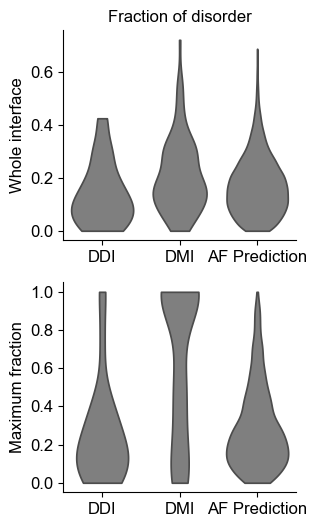

In [5]:
# Plot disorder fraction
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(3,6))
sns.violinplot(data=alldf, x='dataset', y='if_disfrac', color=global_color, inner=None, cut=0, ax=ax1)
ax1.set_xlabel(None)
ax1.set_ylabel('Whole interface', fontsize=global_fontsize)
ax1.tick_params(axis='both', labelsize= global_fontsize)
ax1.set_title('Fraction of disorder', fontsize=global_fontsize)

sns.violinplot(data=alldf, x='dataset', y='if_maxdis', color=global_color, inner=None, cut=0, ax=ax2)
ax2.set_xlabel(None)
ax2.set_ylabel('Maximum fraction', fontsize=global_fontsize)
ax2.tick_params(axis='both', labelsize= global_fontsize)

fig.savefig(f'{save_path}IF_disorder_comparison.pdf',
           transparent=True,bbox_inches='tight')
fig.savefig(f'{save_path}IF_disorder_comparison.jpeg',dpi=300,
           transparent=True,bbox_inches='tight')